In [1]:
# %pip install matplotlib
# %pip install stellargraph
# %pip install tensorflow
# %pip install pandas
# %pip install numpy
# %pip install pydot
# %pip install graphviz
# %pip install networkx

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import matplotlib.pyplot as plt
import stellargraph as sg
import pandas as pd
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow import keras
from IPython.display import display, HTML

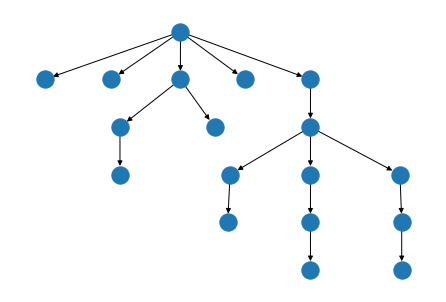

In [3]:
G = nx.nx_pydot.read_dot(
  "output/jhotdraw/gv/CH.ifa.draw.applet.DrawApplet/actionPerformed-724427751.gv")

nx.draw(G, pos=nx.nx_pydot.pydot_layout(G, prog='dot'))

In [4]:
classes = [cls for cls in os.listdir("output/jhotdraw/txt/") if not cls.endswith(".txt")]
methods_map = {cls:{mth.replace('.txt', ''):nx.read_adjlist(f"output/jhotdraw/txt/{cls}/{mth}", create_using=nx.DiGraph) for mth in os.listdir(f"output/jhotdraw/txt/{cls}")} for cls in classes}
# nx.nx_pydot.read_dot(f"output/jhotdraw/txt/{cls}/{mth}")
methods_map.keys()

dict_keys(['CH.ifa.draw.applet.DrawApplet', 'CH.ifa.draw.applet.SleeperThread', 'CH.ifa.draw.application.DrawApplication', 'CH.ifa.draw.contrib.ChopPolygonConnector', 'CH.ifa.draw.contrib.DiamondFigure', 'CH.ifa.draw.contrib.PolygonFigure', 'CH.ifa.draw.contrib.PolygonHandle', 'CH.ifa.draw.contrib.PolygonScaleHandle', 'CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.contrib.TriangleFigure', 'CH.ifa.draw.contrib.TriangleRotationHandle', 'CH.ifa.draw.figures.ArrowTip', 'CH.ifa.draw.figures.AttributeFigure', 'CH.ifa.draw.figures.BorderDecorator', 'CH.ifa.draw.figures.BorderTool', 'CH.ifa.draw.figures.ChopEllipseConnector', 'CH.ifa.draw.figures.ConnectedTextTool', 'CH.ifa.draw.figures.ElbowConnection', 'CH.ifa.draw.figures.ElbowHandle', 'CH.ifa.draw.figures.ElbowTextLocator', 'CH.ifa.draw.figures.EllipseFigure', 'CH.ifa.draw.figures.FigureAttributes', 'CH.ifa.draw.figures.FontSizeHandle', 'CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.figures.GroupFigure', 'CH.ifa.draw.figures.GroupHandle

In [5]:
methods = [item for sublist in methods_map.values() for item in sublist.values()]
len(methods)

1583

In [6]:
for m in methods:
  for n, data in m.nodes(data=True):
    data['feature'] = [1 if 'IfStmt' in n or 'SwitchStmt' in n else 0,
        1 if 'DoStmt' in n or 'WhileStmt' in n or 'ForStmt' in n else 0,
        1 if 'ObjectCreationExpr' in n else 0]
    # data['label'] = n.split('_')[-1]

methods[3].nodes.data()

NodeDataView({'n_MethodDeclaration': {'feature': [0, 0, 0]}, 'n_0_Modifier': {'feature': [0, 0, 0]}, 'n_1_SimpleName': {'feature': [0, 0, 0]}, 'n_2_ClassOrInterfaceType': {'feature': [0, 0, 0]}, 'n_2_0_SimpleName': {'feature': [0, 0, 0]}, 'n_3_BlockStmt': {'feature': [0, 0, 0]}, 'n_3_0_ExpressionStmt': {'feature': [0, 0, 0]}, 'n_3_0_0_VariableDeclarationExpr': {'feature': [0, 0, 0]}, 'n_3_0_0_0_VariableDeclarator': {'feature': [0, 0, 0]}, 'n_3_0_0_0_0_ClassOrInterfaceType': {'feature': [0, 0, 0]}, 'n_3_0_0_0_0_0_SimpleName': {'feature': [0, 0, 0]}, 'n_3_0_0_0_1_SimpleName': {'feature': [0, 0, 0]}, 'n_3_0_0_0_2_ObjectCreationExpr': {'feature': [0, 0, 1]}, 'n_3_0_0_0_2_0_ClassOrInterfaceType': {'feature': [0, 0, 0]}, 'n_3_0_0_0_2_0_0_SimpleName': {'feature': [0, 0, 0]}, 'n_3_1_ExpressionStmt': {'feature': [0, 0, 0]}, 'n_3_1_0_MethodCallExpr': {'feature': [0, 0, 0]}, 'n_3_1_0_0_NameExpr': {'feature': [0, 0, 0]}, 'n_3_1_0_0_0_SimpleName': {'feature': [0, 0, 0]}, 'n_3_1_0_1_SimpleName': {'f

In [7]:
# for cls in methods_map:
#   for mtd in methods_map[cls]:
#     G = methods_map[cls][mtd]
#     os.makedirs(f"output/jhotdraw/png/{cls}/", exist_ok=True)
#     plt.figure()
#     nx.draw(G, pos=nx.nx_pydot.pydot_layout(G, prog='dot'))
#     plt.savefig(f"output/jhotdraw/png/{cls}/{mtd}.png")

In [8]:
graphs = [sg.StellarDiGraph.from_networkx(m, node_features='feature') for m in methods]

# for i in range(len(methods)):
#   g, m = graphs[i], methods[i]
#   for n_id, n_data in g.nodes(data=True):
#     n_data['feature'] = [m.nodes[n_id]['conditional'], m.nodes[n_id]['loop'], m.nodes[n_id]['creational']]


summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,1583.0,1583.0
mean,37.9,36.9
std,51.7,51.7
min,3.0,2.0
25%,12.0,11.0
50%,21.0,20.0
75%,45.0,44.0
max,772.0,771.0


In [9]:
print(graphs[0].info())

StellarDiGraph: Directed multigraph
 Nodes: 18, Edges: 17

 Node types:
  default: [18]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [17]
        Weights: all 1 (default)
        Features: none


In [10]:
generator = sg.mapper.PaddedGraphGenerator(graphs)

gc_model = sg.layer.GCNSupervisedGraphClassification(
    [64, 32], ["relu", "relu"], generator, pool_all_layers=True
)

inp1, out1 = gc_model.in_out_tensors()
inp2, out2 = gc_model.in_out_tensors()

vec_distance = tf.norm(out1 - out2, axis=1)

pair_model = keras.Model(inp1 + inp2, vec_distance)
embedding_model = keras.Model(inp1, out1)

In [11]:
def graph_distance(graph1, graph2):
    g1 = graph1.to_networkx(feature_attr=None)
    g2 = graph2.to_networkx(feature_attr=None)
    return nx.graph_edit_distance(g1, g2)

In [12]:
graph_idx = np.random.RandomState(0).randint(len(graphs), size=(100, 2))
targets = [graph_distance(graphs[left], graphs[right]) for left, right in graph_idx]
train_gen = generator.flow(graph_idx, batch_size=10, targets=targets)

KeyboardInterrupt: 

In [ ]:
pair_model.compile(keras.optimizers.Adam(1e-2), loss="mse")
%%time
history = pair_model.fit(train_gen, epochs=500, verbose=0)
sg.utils.plot_history(history)

In [ ]:
embeddings = embedding_model.predict(generator.flow(graphs))